In [17]:
#Important imports for running code
import numpy as np
import scipy.optimize as sp
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [18]:
Calibrations =['Data_Air_to_Glass_Labday_3.txt','Data_Glass_to_air_Labday_3.txt']

Air_to_Glass = np.loadtxt(Calibrations[0])
Glass_to_Air = np.loadtxt(Calibrations[1])

theta1_atg = Air_to_Glass[:, 0]
thetam_atg = Air_to_Glass[:, 1]

theta1_gta = Glass_to_Air[:, 0]
thetam_gta = Glass_to_Air[:, 1]

# Convert into radians
theta1_atg = theta1_atg * np.pi/180
theta1_gta = theta1_gta * np.pi/180
thetam_atg = thetam_atg * np.pi/180
thetam_gta = np.unwrap(thetam_gta,period=np.pi) * np.pi/180

theta1 = np.array([theta1_atg, theta1_gta])
thetam = np.array([thetam_atg, thetam_gta])

theta2_list = []

# Calculate real angle
for i in range(len(theta1)):
    theta2_list.append(theta1[i] - thetam[i])

theta2 = np.array(theta2_list)

FileNotFoundError: Data_Air_to_Glass_Labday_3.txt not found.

In [ ]:
theta1_atg_err = np.full_like(np.sin(theta1[0]), abs(np.sin(0.5 * np.pi/180)))
theta2_atg_err = np.full_like(np.sin(theta2[0]), abs(np.sin(0.5 * np.pi/180)))
theta1_gta_err = np.full_like(np.sin(theta1[1]), abs(np.sin(0.5 * np.pi/180)))
theta2_gta_err = np.full_like(np.sin(theta2[1]), abs(np.sin(0.5 * np.pi/180)))

In [ ]:
#Fit for the code
def n_fit(theta1, n):
    return theta1 / n

n_guess = 2

AIR TO GLASS LAB DAY 3

The index of refraction for the glass is 1.5269 plusminus 0.007


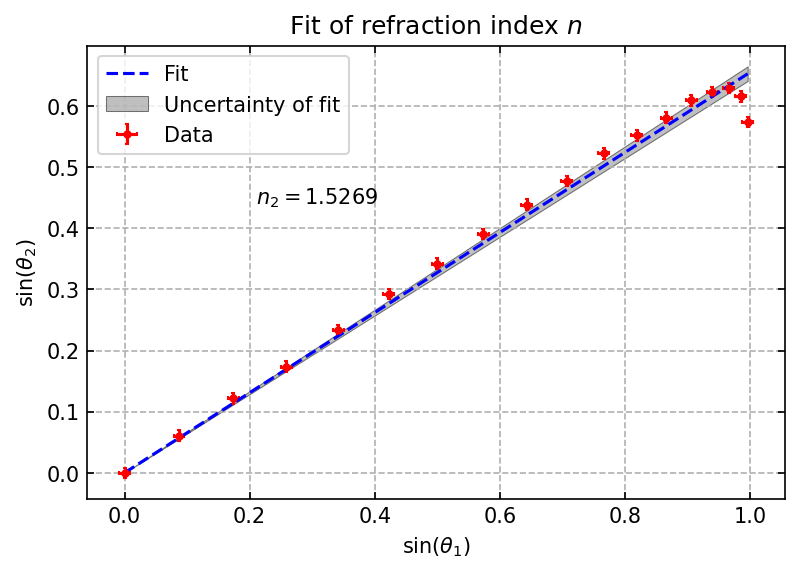

In [ ]:
p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1[0]), np.sin(theta2[0]), sigma = theta1_atg_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[0]), np.sin(theta2[0]), xerr = theta1_atg_err, yerr = theta2_atg_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[0]), n_fit(np.sin(theta1[0]), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1[0]), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Air-to-Glass')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
n_2_atg = np.sqrt(p_cov[0][0])
plt.show()

GLASS TO AIR LAB DAY 3

The index of refraction for the glass is 0.9585 plusminus 0.0028


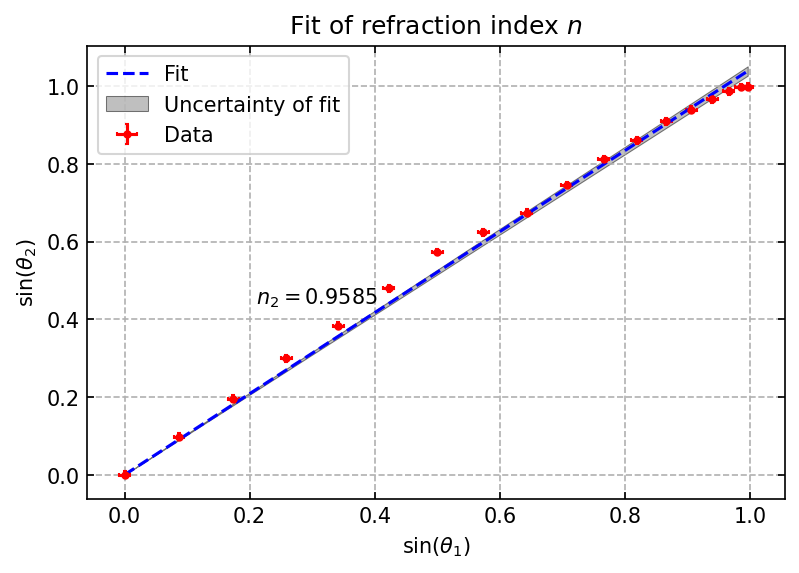

In [ ]:
p_opt, p_cov = sp.curve_fit(n_fit, np.sin(theta1[1]), np.sin(theta2[1]), sigma = theta1_gta_err, absolute_sigma = True, p0 = n_guess)

fig, ax = plt.subplots()
# ax.plot(np.sin(theta1), np.sin(theta2), 'o', label='Data', color = 'tab:red')  # Plotting theta1 vs theta2
ax.errorbar(np.sin(theta1[1]), np.sin(theta2[1]), xerr = theta1_gta_err, yerr = theta2_gta_err, fmt = 'o', capsize=1, color='red', markersize=3, label='Data')
ax.plot(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt[0]), '--', color= 'blue', label='Fit')  # Plotting the fit curve

ax.fill_between(np.sin(theta1[1]), n_fit(np.sin(theta1[1]), p_opt[0] - 4*np.sqrt(p_cov[0][0])), n_fit(np.sin(theta1[1]), p_opt[0] + 4* np.sqrt(p_cov[0][0])), 
                color = 'grey', alpha = 0.5, edgecolor = 'k', linewidth = 0.5, label = 'Uncertainty of fit')

ax.set_xlabel(r'$\sin(\theta_1)$')
ax.set_ylabel(r'$\sin(\theta_2)$')
ax.grid(ls = '--')
ax.set_title(r'Fit of refraction index $n$ for Glass-to-Air')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(0.21, 0.44, f'$n_2 = {round(p_opt[0], 4)}$')

print('The index of refraction for the glass is %s plusminus %s' % (round(p_opt[0], 4), round(np.sqrt(p_cov[0][0]), 4)))
n_2_gta = np.sqrt(p_cov[0][0])
plt.show()




COMPARING R+T01

In [ ]:
#Get data
S_pol_L2 = np.loadtxt('S_Polarization_Labday_2.txt')

#Intensity of laser
E_0 = 3.4

#Intensity of transmitted and reflected light
E_1 = S_pol_L2[:,2]
E_2 = S_pol_L2[:,5]

NameError: name 'np' is not defined

In [ ]:
#Getting the small r value
r_s = E_1/E_0
r_s

NameError: name 'E_1' is not defined

In [ ]:
#Getting the small t value
t_s = E_2/E_0
t_s

NameError: name 'E_2' is not defined

In [ ]:
#Large R value:
R_s = r_s**2
R_s

NameError: name 'r_s' is not defined

In [ ]:
#Import the angles measured:
theta1_s = S_pol_L2[:,0]
thetam_reflect_s = S_pol_L2[:,4]
thetam_trans_s = S_pol_L2[:,1]
#convert to radians:
theta1_s = theta1_s * np.pi/180
thetam_reflect_s = np.unwrap(thetam_reflect_s,period=np.pi) * np.pi/180
thetam_trans_s = np.unwrap(thetam_trans_s, period=np.pi) *np.pi/180

# Calculate real angle
theta2_reflect_s = theta1_s - thetam_reflect_s
theta2_trans_s = theta1_s - thetam_trans_s

NameError: name 'S_pol_L2' is not defined

In [ ]:
#Large T value:

T_s = (np.cos(theta2_trans_s)) / (np.cos(theta1_s)) *n_2_s *t_s**2
T_s

NameError: name 'theta2_trans_s' is not defined

In [ ]:
#Check if R+T holds:
total_s = R_s+T_s
total_s

NameError: name 'R_s' is not defined

In [ ]:
#Difference from 1
D_s = 1- R_s - T_s
D_s

NameError: name 'R_s' is not defined

In [ ]:
#Brewster angle
Brewster = np.arctan(n_2_s)
#Critical angle for internal reflection
Critical = np.arcsin(1/n_2_s)

NameError: name 'n_2_s' is not defined

NameError: name 'theta1_s' is not defined

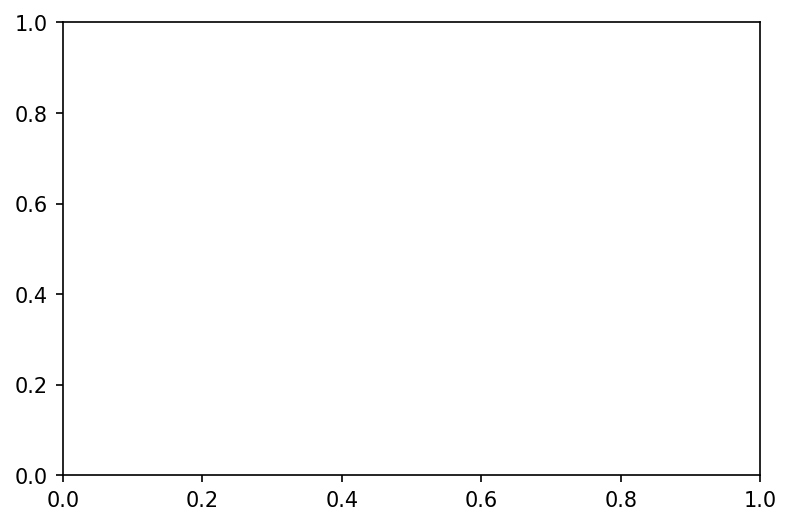

In [ ]:
fig, ax = plt.subplots()

ax.plot(theta1_s, T_s, '.', color= 'blue',label = 'T_s')  # Plotting Transmitted Light
ax.plot(theta1_s, R_s, '.', color= 'red',label = 'T_s')  # Plotting Reflected Light
ax.plot(theta1_s, total_s, '.',markersize =4, color = 'black', label = 'total') #Plotting total light measured
ax.vlines(x = Brewster, ymin=0, ymax=0.1)
#ax.vlines(x = Critical, ymin=0, ymax=0.1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$ R + T = 1 $')
ax.grid(ls = '--')
ax.set_title(r'Intensity Relations on S-Polarization')
ax.legend()
ax.tick_params(direction = 'in', top = True, right = True)
ax.text(1.01, 0.0, s=r"$\theta_{B}$", fontsize=8)
plt.show()

INTENSITY PLOTS AIR TO GLASS

In [ ]:
# Defining all the functions for the intensity
def reflected_p(angle1, angle2):
    return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2

def reflected_s(angle1, angle2):
    return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2

def transmitted_p(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))

def transmitted_s(angle1, angle2):
    return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2

/tmp/ipykernel_62818/3587821088.py:3: RuntimeWarning: invalid value encountered in divide
  return np.tan(angle1 - angle2)**2 / np.tan(angle1 + angle2)**2
/tmp/ipykernel_62818/3587821088.py:6: RuntimeWarning: invalid value encountered in divide
  return np.sin(angle1 - angle2)**2 / np.sin(angle1 + angle2)**2


NameError: name 'theta1_s' is not defined

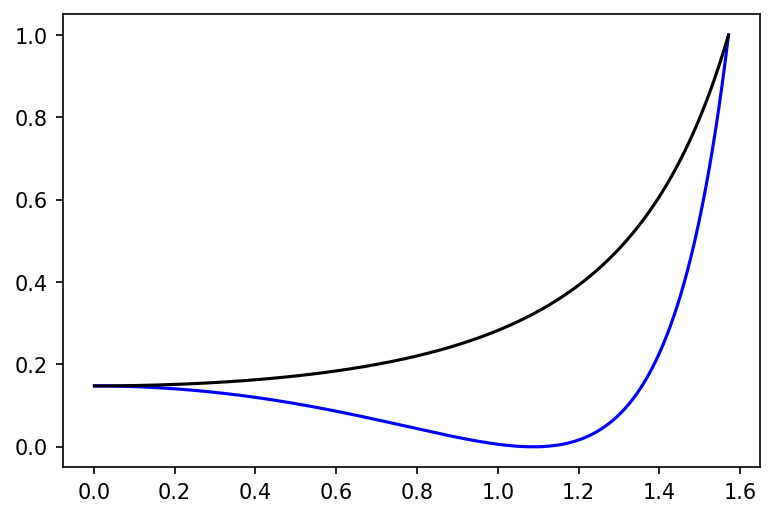

In [ ]:
# Creating theoractical values for the angles
theoretical_theta1 = np.linspace(0, 90, 1000) * np.pi/180
theoretical_thetam = np.linspace(0, 50, 1000) * np.pi/180
theoretical_theta2 = theoretical_theta1 - theoretical_thetam

# Plotting reflection
plt.plot(theoretical_theta1, reflected_p(theoretical_theta1, theoretical_theta2), '-', color = 'blue', label = r'$R_p$')
plt.plot(theoretical_theta1, reflected_s(theoretical_theta1, theoretical_theta2), '-', color = 'black', label = r'$R_s$')
plt.plot(theta1_s, reflected_s(theta1_s, theta2_reflect_s), '.', label = 'raw data')


# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $R_p(\theta_1, \theta_2)$ and $R_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$R [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

/tmp/ipykernel_62818/3587821088.py:9: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / (np.sin(angle1 + angle2)**2 * np.cos(angle1 - angle2))
/tmp/ipykernel_62818/3587821088.py:12: RuntimeWarning: invalid value encountered in divide
  return np.sin(2 * angle1) * np.sin(2 * angle2) / np.sin(angle1 + angle2)**2


NameError: name 'theta1_s' is not defined

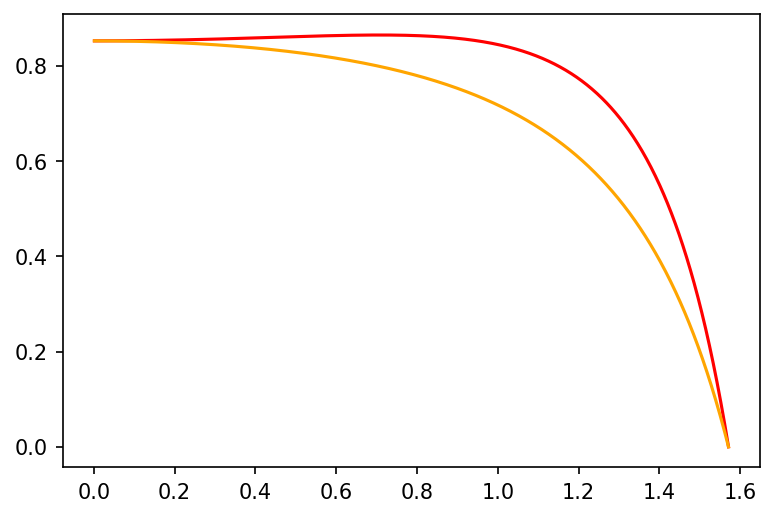

In [ ]:
# Plotting transmission
plt.plot(theoretical_theta1, transmitted_p(theoretical_theta1, theoretical_theta2), '-', color = 'red', label = r'$T_p$')
plt.plot(theoretical_theta1, transmitted_s(theoretical_theta1, theoretical_theta2), '-', color = 'orange', label = r'$T_s$')
plt.plot(theta1_s, transmitted_s(theta1_s, theta2_trans_s), '.', label = "Raw data")
# brewster = np.arctan(np.sqrt(p_cov[0][0]))
# plt.vlines(brewster, 0, 0.2)
   
# Adjust figure
plt.title(r'Theoretical behavior of $T_p(\theta_1, \theta_2)$ and $T_s(\theta_1, \theta_2)$')
plt.xlabel(r'$\theta [rad]$')
plt.ylabel(r'$T [W]$')
plt.grid(ls = '--')
plt.tick_params(direction = 'in', top = True, right = True)
plt.legend()

INTENSITY FOR GLASS TO AIR